In [4]:
#from statistical_utilities import math_utilities as utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d
import statsmodels.api as sm
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

**ALMACENAMIENTO DE DATOS:** Todos los datos tomados en esta práctica están almacenados en OneDrive: https://uniandes-my.sharepoint.com/:f:/g/personal/k_murcia_uniandes_edu_co/EpqZUJG_V_pPrmdpxrRXXbgBaegSgA48bKjsUeEoiaT3jg?e=L8zMbV

**INCERTIDUMBRES:** 

- $\sigma_{U_1} = 0.01 \text{ V}$.
- $\sigma_{I_A} = 0.01 \text{ nA}$.
- $\sigma_{T} = 1 \text{ °C}$.

---
---

# SESIÓN 01

**FECHA:** 2024-08-15

**HORA:** 16:00

**EXPERIMENTALISTAS:** Juan Carlos Rojas Velásquez (jc.rojasv1@uniandes.edu.co) & Katherin A. Murcia S. (k.murcia@uniandes.edu.co)

**LABORATORIO:** B-301.

**OBJETIVOS DE LA SESIÓN:**
- Tomar series de datos con $T$, $U_2$ y $U_H$ constantes (al menos 3).
- Tomar series de datos a diferentes temperaturas con $U_2$ y $U_H$ constantes (al menos 3).
- Tomar series de datos con variaciones de $U_2$ y con $T$ y $U_H$ fijos (al menos 3).
- Tomar series de datos con variaciones de $U_H$ a $T$ y $U_2$ constantes(al menos 3).

**CONEXIONES:** Se conectaron los dispositivos siguiendo los esquemas de los manuales operativos. Los cuales resultaron en las siguientes conexiones de la estufa (derecha) y el módulo de control (izquierda):

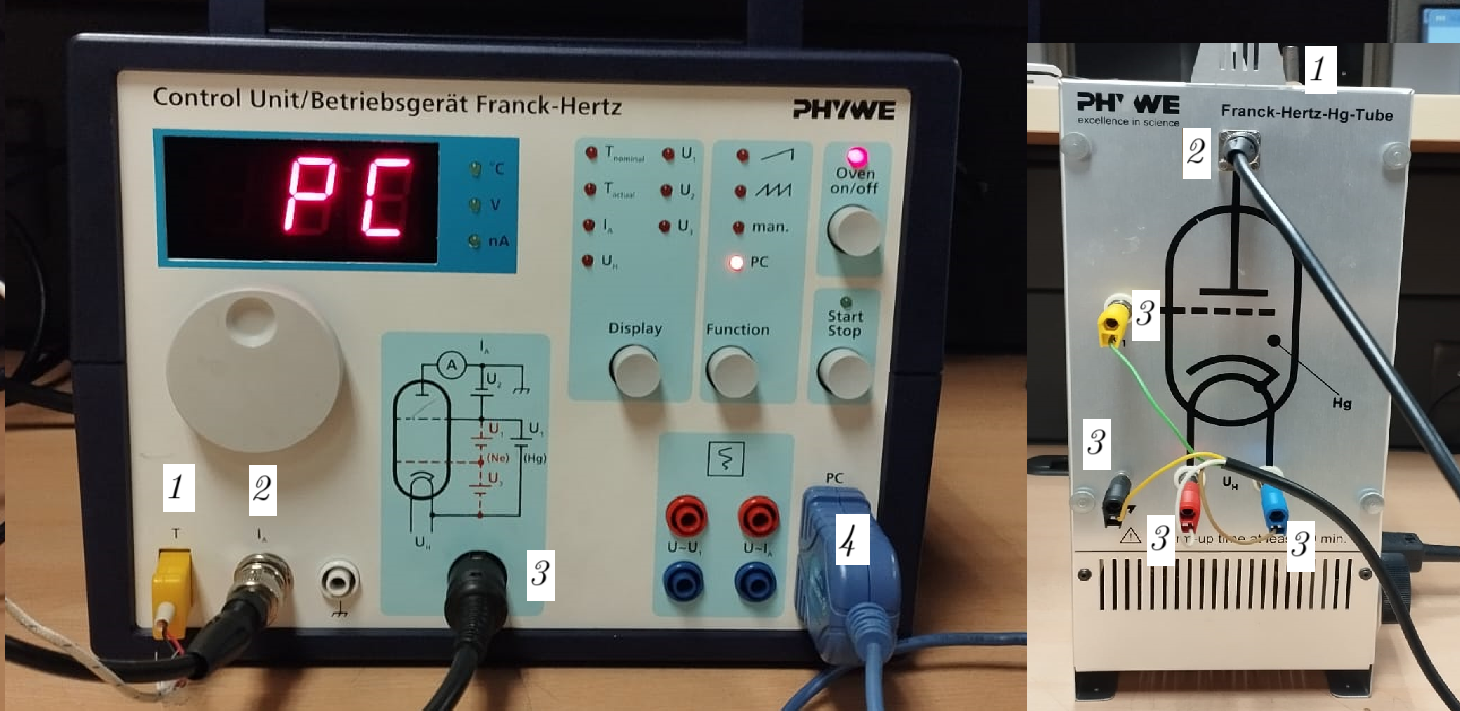

Las conexiones van así (aquí se ilustran las conexiones por la correspondencia de índices): **1.** Sensor de temperatura se introduce en la estufa. **2.** Cable de medición de corriente $I_A$. **3.** Conexión de alimentación de voltajes que se divide en cuatro cables: $U_H$ (cables rojo y azul), $U_1$ (cable amarillo) y tierra (cable negro) desde el controlador a la estufa y **4.** Conexión del módulo de control con el computador.

**CONDICIONES ADICIONALES:** Hay una ventana grande abierta junto a algunos metros del horno. Esta provoca brisa, creemos que podría alterar de manera sutil los datos tomados.

-----

# ACTIVIDAD 02. EJERCICIO 01.

**PARÁMETROS:** Se ajustaron los siguentes parámetros en el software para hacer las mediciones: $U_1 = 60.00 \text{V}$, $U_2 = 1.5 \text{V}$, $U_H = 6.3 \text{V}$, variando las temperaturas para cada una de las tomas de datos alrededor de $T=205\text{ °C}$.

- Los primeros intentos de hacer mediciones fallaron. En adelante se realizaron graduaciones de temperaturas de forma que los cambios en temperatura no fueran tan drásticos e inestables.

- Incrementamos la temperatura muy lentamente y nos retrasamos.

**TOMA DE DATOS:** 
Las series de datos se llaman: ACTIVIDAD 02. TOMA N. T=X°C.csv

In [10]:
dat1 = pd.read_csv("ACTIVIDAD 02. TOMA 02. T=203°C.csv",sep="	")
dat2 = pd.read_csv("ACTIVIDAD 02. TOMA 04. T=204°C.csv",sep="	")
dat3 = pd.read_csv("ACTIVIDAD 02. TOMA 05. T=206°C.csv",sep="	")

In [11]:
dat1.T

,0,1,2,3,4,5,6,7,8,9,...,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456
Voltage U1,0.02,0.04,0.07,0.09,0.12,0.14,0.17,0.19,0.21,0.24,...,59.78,59.80,59.82,59.85,59.87,59.90,59.92,59.95,59.97,59.99
Corriente IA,0.43,0.46,0.46,0.48,0.46,0.49,0.47,0.48,0.42,0.45,...,14.16,14.24,14.40,14.48,14.65,14.68,14.84,14.98,15.12,15.18


In [12]:
dat2.T

,0,1,2,3,4,5,6,7,8,9,...,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456
Voltage U1,0.02,0.04,0.07,0.09,0.12,0.14,0.17,0.19,0.21,0.24,...,59.78,59.80,59.82,59.85,59.87,59.90,59.92,59.95,59.97,59.99
Corriente IA,0.40,0.36,0.44,0.41,0.47,0.38,0.48,0.39,0.51,0.41,...,7.31,7.39,7.38,7.44,7.47,7.58,7.62,7.65,7.67,7.73


In [13]:
dat3.T

,0,1,2,3,4,5,6,7,8,9,...,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456
Voltage U1,0.02,0.04,0.07,0.09,0.12,0.14,0.17,0.19,0.21,0.24,...,59.78,59.80,59.82,59.85,59.87,59.90,59.92,59.95,59.97,59.99
Corriente IA,0.67,0.65,0.58,0.60,0.54,0.56,0.50,0.55,0.51,0.57,...,41.05,41.21,41.36,41.54,41.74,41.96,42.14,42.30,42.42,42.56


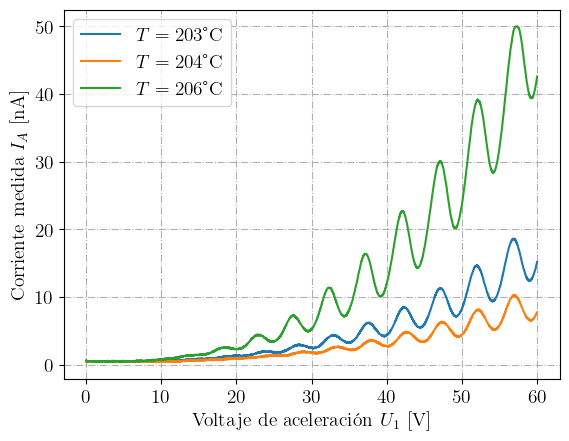

In [14]:
plt.plot(dat1["Voltage U1"].values,dat1["Corriente IA"].values, label=r"$T = 203$°C")
plt.plot(dat2["Voltage U1"].values,dat2["Corriente IA"].values, label=r"$T = 204$°C")
plt.plot(dat3["Voltage U1"].values,dat3["Corriente IA"].values, label=r"$T = 206$°C")
plt.xlabel(r"Voltaje de aceleración $U_1$ [V]")
plt.ylabel(r"Corriente medida $I_A$ [nA]")
plt.grid(linestyle = "-.")
plt.legend()
plt.savefig("Gráfica Actividad 02 Punto 1.png")

Cada gráfica presenta un comportamiento creciente y oscila; cuyo valles y picos se amplifican a medida que se incrementa el voltaje. Si bien las posiciones de los valles y picos de cada una de las series de datos no se ven afectadas al variar la temperatura, se puede evidenciar un cambio en la magnitud de la corriente medida. Consideramos, dado que las posiciones de los valles y picos están alineadas bastante bien, que no sería necesario hacer un análisis estadísitico de los datos.

Aprendimos a tomar mediciones ágilmente

----

# ACTIVIDAD 02. EJERCICIO 02.

**PARÁMETROS:** Se ajustaron los siguentes parámetros en el software para hacer las mediciones: $U_1 = 60.00 \text{V}$, $U_2 = 1.5 \text{V}$ y $U_H = 6.3 \text{V}$ variando las temperaturas para cada una de las tomas de datos.

**TOMA DE DATOS:** Las series de datos se llaman: ACTIVIDAD 02. TOMA N. T=X°C.csv

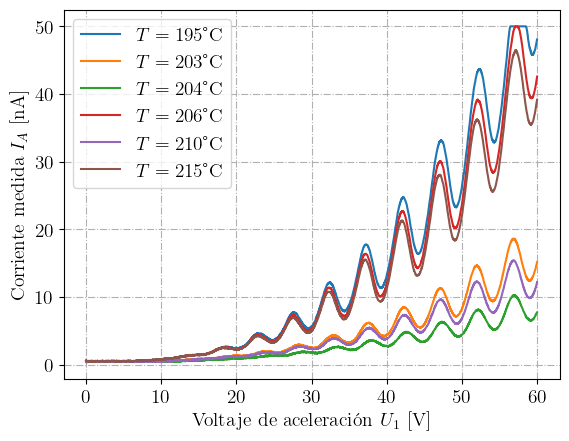

In [15]:
dat1 = pd.read_csv("ACTIVIDAD 02. TOMA 02. T=203°C.csv",sep="	")
dat2 = pd.read_csv("ACTIVIDAD 02. TOMA 04. T=204°C.csv",sep="	")
dat3 = pd.read_csv("ACTIVIDAD 02. TOMA 05. T=206°C.csv",sep="	")
dat4 = pd.read_csv("ACTIVIDAD 02. TOMA 06. T=195°C.csv",sep="	")
#dat5 = pd.read_csv("ACTIVIDAD 02. TOMA 04. T=204°C.csv",sep="	")
dat6 = pd.read_csv("ACTIVIDAD 02. TOMA 07. T=215°C.csv",sep="	")
#dat7 = pd.read_csv("ACTIVIDAD 02. TOMA 01. T=210°C.csv",sep="	")
dat8 = pd.read_csv("ACTIVIDAD 02. TOMA 03. T=210°C.csv",sep="	")

plt.plot(dat4["Voltage U1"].values,dat4["Corriente IA"].values, label=r"$T = 195$°C")
plt.plot(dat1["Voltage U1"].values,dat1["Corriente IA"].values, label=r"$T = 203$°C")
plt.plot(dat2["Voltage U1"].values,dat2["Corriente IA"].values, label=r"$T = 204$°C")
plt.plot(dat3["Voltage U1"].values,dat3["Corriente IA"].values, label=r"$T = 206$°C")
plt.plot(dat8["Voltage U1"].values,dat8["Corriente IA"].values, label=r"$T = 210$°C")
plt.plot(dat6["Voltage U1"].values,dat6["Corriente IA"].values, label=r"$T = 215$°C")

#plt.plot(dat5["Voltage U1"].values,dat5["Corriente IA"].values, label=r"$T = 204$°C")
#plt.plot(dat7["Voltage U1"].values,dat7["Corriente IA"].values, label=r"$T = 210$°C")


plt.xlabel(r"Voltaje de aceleración $U_1$ [V]")
plt.ylabel(r"Corriente medida $I_A$ [nA]")
plt.grid(linestyle = "-.")
plt.legend()
plt.savefig("Gráficas Actvidad 2 Punto 2.png")

El comportamiento de los datos no es el esperado dado que se espera que a medida que la temperatura aumente las magnitudes de corriente disminuyan, sin embargo se encuentran puntos de acumulación den corriente 

-----

# ACTIVIDAD 02. EJERCICIO 03.

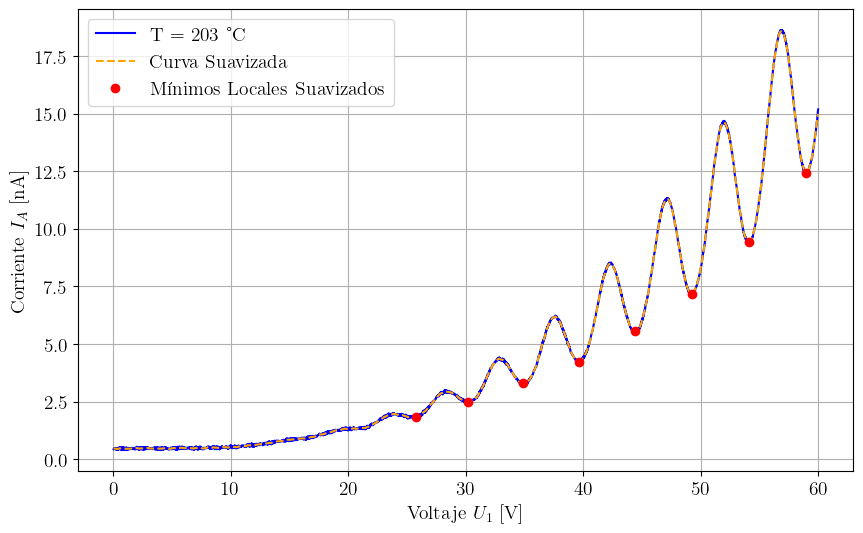

[25.78 30.2  34.84 39.65 44.41 49.23 54.09 58.99]
4.744285714285715


In [16]:
file_path = 'ACTIVIDAD 02. TOMA 02. T=203°C.csv'
data = pd.read_csv(file_path, sep='	')
N = 8
# Convertir los datos a arrays numpy
voltaje = data['Voltage U1'].values
corriente = data['Corriente IA'].values

# Suavizar la curva usando un filtro gaussiano
smoothed_corriente = gaussian_filter1d(corriente, sigma=3)

# Encontrar el mínimo de la curva suavizada
min_envolvente_index = np.argmin(smoothed_corriente)

# Encontrar los mínimos locales en la curva suavizada
minima_suavizada_indices, _ = find_peaks(-smoothed_corriente)  # Invertir la corriente suavizada para encontrar mínimos

# Crear un DataFrame con los resultados de los mínimos locales
minima_suavizada_voltajes = voltaje[minima_suavizada_indices]
minima_suavizada_corrientes = smoothed_corriente[minima_suavizada_indices]

minima_suavizada_df = pd.DataFrame({
    'Voltaje U1': minima_suavizada_voltajes[:-7],
    'Corriente IA Suavizada': minima_suavizada_corrientes[:-7]
})

# Mostrar los resultados de los mínimos locales
# print(minima_suavizada_df)

# Plotear la curva original, la curva suavizada, y los mínimos locales
plt.figure(figsize=(10, 6))
plt.plot(voltaje, corriente, label=r"T = 203 °C", color='blue')
plt.plot(voltaje, smoothed_corriente, label="Curva Suavizada", color='orange', linestyle='--')
plt.plot(voltaje[minima_suavizada_indices][-1*N:], smoothed_corriente[minima_suavizada_indices][-1*N:], 'ro', label='Mínimos Locales Suavizados')
plt.xlabel('Voltaje $U_1$ [V]')
plt.ylabel('Corriente $I_A$ [nA]')
plt.legend()
plt.grid(True)
plt.show()
print(minima_suavizada_voltajes[-8:])
min_import = minima_suavizada_voltajes[-8:]

delta1 = np.zeros(len(min_import)-1)

for j in range(len(delta1)):
    delta1[j] = min_import[j+1] - min_import[j]
    
print(np.mean(delta1))

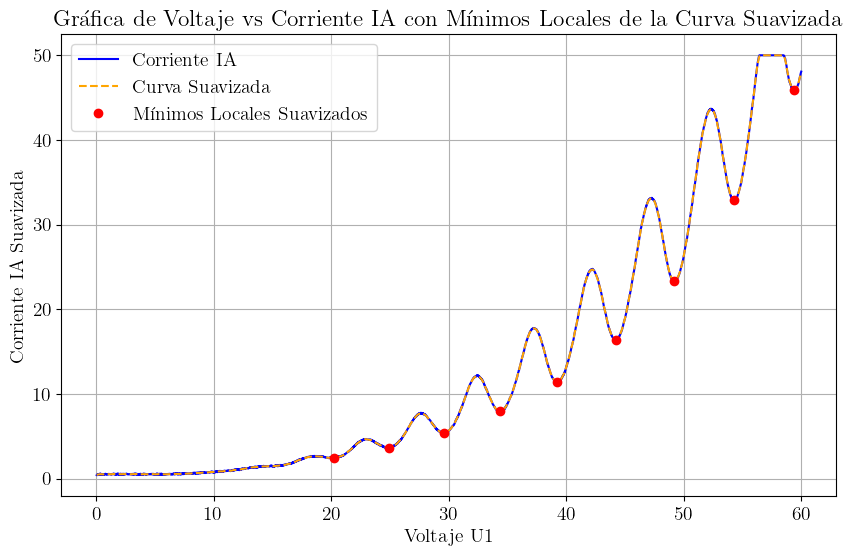

[20.24 24.9  29.62 34.35 39.21 44.2  49.2  54.28 59.36]
4.890000000000001


In [17]:
file_path = 'ACTIVIDAD 02. TOMA 06. T=195°C.csv'
data = pd.read_csv(file_path, sep='	')
N = 9
# Convertir los datos a arrays numpy
voltaje = data['Voltage U1'].values
corriente = data['Corriente IA'].values

# Suavizar la curva usando un filtro gaussiano
smoothed_corriente = gaussian_filter1d(corriente, sigma=3)

# Encontrar el mínimo de la curva suavizada
min_envolvente_index = np.argmin(smoothed_corriente)

# Encontrar los mínimos locales en la curva suavizada
minima_suavizada_indices, _ = find_peaks(-smoothed_corriente)  # Invertir la corriente suavizada para encontrar mínimos

# Crear un DataFrame con los resultados de los mínimos locales
minima_suavizada_voltajes = voltaje[minima_suavizada_indices]
minima_suavizada_corrientes = smoothed_corriente[minima_suavizada_indices]

minima_suavizada_df = pd.DataFrame({
    'Voltaje U1': minima_suavizada_voltajes[:-7],
    'Corriente IA Suavizada': minima_suavizada_corrientes[:-7]
})

# Mostrar los resultados de los mínimos locales
# print(minima_suavizada_df)

# Plotear la curva original, la curva suavizada, y los mínimos locales
plt.figure(figsize=(10, 6))
plt.plot(voltaje, corriente, label="Corriente IA", color='blue')
plt.plot(voltaje, smoothed_corriente, label="Curva Suavizada", color='orange', linestyle='--')
plt.plot(voltaje[minima_suavizada_indices][-1*N:], smoothed_corriente[minima_suavizada_indices][-1*N:], 'ro', label='Mínimos Locales Suavizados')
plt.title('Gráfica de Voltaje vs Corriente IA con Mínimos Locales de la Curva Suavizada')
plt.xlabel('Voltaje U1')
plt.ylabel('Corriente IA Suavizada')
plt.legend()
plt.grid(True)
plt.show()
print(minima_suavizada_voltajes[-N:])
min_import = minima_suavizada_voltajes[-N:]

delta2 = np.zeros(len(min_import)-1)

for j in range(len(delta2)):
    delta2[j] = min_import[j+1] - min_import[j]
    
print(np.mean(delta2))

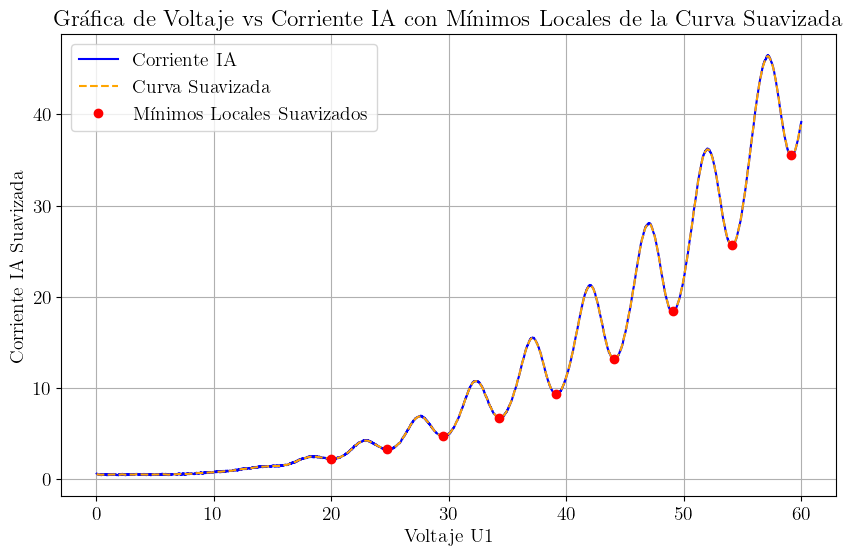

[19.95 24.73 29.52 34.28 39.14 44.05 49.05 54.09 59.16]
4.901249999999999


In [18]:
file_path = 'ACTIVIDAD 02. TOMA 07. T=215°C.csv'
data = pd.read_csv(file_path, sep='	')
N = 9
# Convertir los datos a arrays numpy
voltaje = data['Voltage U1'].values
corriente = data['Corriente IA'].values

# Suavizar la curva usando un filtro gaussiano
smoothed_corriente = gaussian_filter1d(corriente, sigma=3)

# Encontrar el mínimo de la curva suavizada
min_envolvente_index = np.argmin(smoothed_corriente)

# Encontrar los mínimos locales en la curva suavizada
minima_suavizada_indices, _ = find_peaks(-smoothed_corriente)  # Invertir la corriente suavizada para encontrar mínimos

# Crear un DataFrame con los resultados de los mínimos locales
minima_suavizada_voltajes = voltaje[minima_suavizada_indices]
minima_suavizada_corrientes = smoothed_corriente[minima_suavizada_indices]

minima_suavizada_df = pd.DataFrame({
    'Voltaje U1': minima_suavizada_voltajes[:-7],
    'Corriente IA Suavizada': minima_suavizada_corrientes[:-7]
})

# Mostrar los resultados de los mínimos locales
# print(minima_suavizada_df)

# Plotear la curva original, la curva suavizada, y los mínimos locales
plt.figure(figsize=(10, 6))
plt.plot(voltaje, corriente, label="Corriente IA", color='blue')
plt.plot(voltaje, smoothed_corriente, label="Curva Suavizada", color='orange', linestyle='--')
plt.plot(voltaje[minima_suavizada_indices][-N:], smoothed_corriente[minima_suavizada_indices][-N:], 'ro', label='Mínimos Locales Suavizados')
plt.title('Gráfica de Voltaje vs Corriente IA con Mínimos Locales de la Curva Suavizada')
plt.xlabel('Voltaje U1')
plt.ylabel('Corriente IA Suavizada')
plt.legend()
plt.grid(True)
plt.show()
print(minima_suavizada_voltajes[-N:])
min_import = minima_suavizada_voltajes[-N:]

delta3 = np.zeros(len(min_import)-1)

for j in range(len(delta3)):
    delta3[j] = min_import[j+1] - min_import[j]
    
delta3
print(np.mean(delta3))

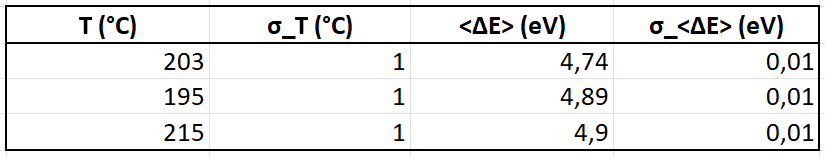

---

# ACTIVIDAD 02. EJERCICIO 04.

Las discrepancias entre la distancia calculada entre mínimos y el valor esperado de $4.67 e\text{V}$ se puede explicar teniendo en cuenta la función trabajo del amperímetro, puede este se debe llevar un poco de energía.

-----

# ACTIVIDAD 02. EJERCICIO 05.

con $T=210 \ °\text{C}$ el sensor de corriente se saturó muchísimo para $U_2 = 1\text{V}$ $\implies$ tomamos datos para valores de $U_2$ entre $1.3 \text{V}$ y $2.3 \text{V}$.

**PARÁMETROS:** Se ajustaron los siguentes parámetros en el software para hacer las mediciones: $U_1 = 60.00 \text{V}$, $T = 210 \text{°C}$ y $U_H = 6.3 \text{V}$ variando las $U_2$ para cada una de las tomas de datos en el rango de $(1.3-2.3)\text{V}$.

**TOMA DE DATOS:** 
Las series de datos se llaman: ACTIVIDAD 02.05. TOMA N. T=210. U_2=X.csv

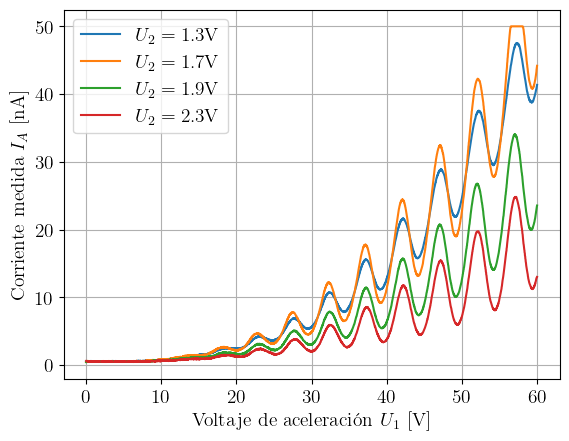

In [19]:
datos1 = pd.read_csv("ACTIVIDAD 02.05. TOMA 01. T=210. U_2=1.7.csv",sep="	")
datos2 = pd.read_csv("ACTIVIDAD 02.05. TOMA 02. T=210. U_2=1.9.csv",sep="	")
datos3 = pd.read_csv("ACTIVIDAD 02.05. TOMA 03. T=210. U_2=1.3.csv",sep="	")
datos4 = pd.read_csv("ACTIVIDAD 02.05. TOMA 04. T=210. U_2=2.13.csv",sep="	")

plt.plot(datos3["Voltage U1"].values,datos3["Corriente IA"].values, label=r"$U_2 = 1.3$V")
plt.plot(datos1["Voltage U1"].values,datos1["Corriente IA"].values, label=r"$U_2 = 1.7$V")
plt.plot(datos2["Voltage U1"].values,datos2["Corriente IA"].values, label=r"$U_2 = 1.9$V")
plt.plot(datos4["Voltage U1"].values,datos4["Corriente IA"].values, label=r"$U_2 = 2.3$V")
plt.legend()
plt.xlabel(r"Voltaje de aceleración $U_1$ [V]")
plt.ylabel(r"Corriente medida $I_A$ [nA]")
plt.grid()


La gráfica anterior muestran las series de datos a temperatura constante ($T = 210°\text{C}$) a diferentes valores de voltaje de desaceleración $U_2$. Los datos se comportan de forma esperada a excepción de la medida para $U_2 = 1.7 \text{V}$ pues se deberaba que su gráfica fuera menor a la dada por los datos $U_2 = 1.3 \text{V}$. Creemos que esto puede deberse a la limitación del instrumento de medición de coriente.

-----

# ACTIVIDAD 02. EJERCICIO 06.

**PARÁMETROS:** $U_1=60.00 \text{V}$. $T=210 \text{°C}$. $U_2=1.5 \text{V}$. Tomamos datos en el rango para $U_H = 5.9 \text{V}$ a $6.7\text{V}$.


**TOMA DE DATOS:** 
Las series de datos se llaman: ACTIVIDAD 02.06. TOMA N. T=210. U_2=2.3. U_H=X.csv

La primera medida para el ejercicio 6 no se debe tener en cuenta dado que intentamos tomar datos con $T=205\text{°C}$ y $U_2=1.5 \text{V}$ y la corriente se saturó para el voltaje $U_H= 5.9\text{V}$ $\implies$ cambiamos los paámetros a los que están registrados bajo el subtítulo de la sección.

Sólo alcanzamos a hacer dos tomas, una de las cuales no sirve.

---

# ACTIVIDAD 02. EJERCICIO 07.

NameError: name 'utils' is not defined

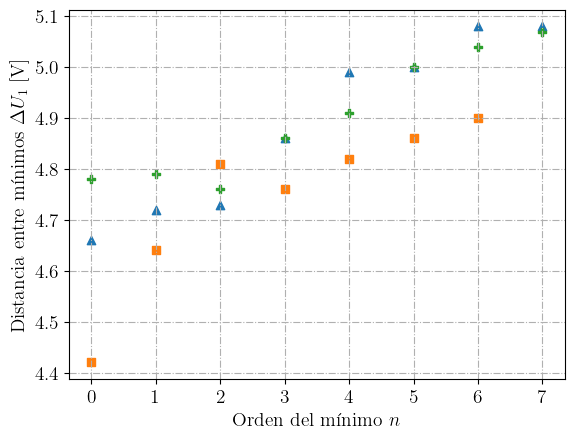

In [20]:
deltas = [delta2,delta1,delta3]
mark = ["^","s","P"]
temps = ["195 °C","203 °C","215 °C"]
nlist = [0,0,0]
for i in range(len(deltas)):
    n = np.array(list(range(len(deltas[i]))))
    nlist[i] = n
    plt.scatter(n,deltas[i],marker=mark[i],label=temps[i])
    
plt.xlabel("Orden del mínimo $n$")
plt.ylabel(r"Distancia entre mínimos $\Delta U_1$ [V]" )
plt.grid(linestyle="-.")

x_space = np.linspace(0,7)
for i in range(len(deltas)):
    params = utils.linear_w_regression(nlist[i],deltas[i],1*np.ones_like(deltas[i]),0.1*np.ones_like(deltas[i]))
    plt.plot(x_space,params[0]*x_space + params[2])
plt.legend()

------
-----

# SESIÓN 02.

**FECHA:** 2024-08-22

**HORA:** 16:00

**EXPERIMENTALISTAS:** Juan Carlos Rojas Velásquez (jc.rojasv1@uniandes.edu.co) & Katherin A. Murcia S. (k.murcia@uniandes.edu.co)

**LABORATORIO:** B-301.

**OBJETIVOS DE LA SESIÓN:**
- Repetir algunas tomas de datos, pues no se observa el comportamiento esperado con varios sets de datos tomados durante la sesión anterior por errores con el sensor de temperatura o con el uso del horno:
- Repetir tomas de datos con $T$, $U_2$ y $U_H$ constantes (tener al menos 5 útiles).
- Repetir tomas de datos a temperaturas diferentes (entre 195°C y 215°C) con $U_2$ y $U_H$ constantes (tener al menos 5 útiles).
- Repetir tomas de datos a $T$ y $U_H$ constantes con variaciones de $U_2$ (la vez pasada tomamos entre 1,3V y 2,3V)(tener al menos 5 útiles).
- Repetir tomas de datos a $T$ y $U_2$ constantes con variaciones de $U_H$ (entre 5,8V y 6,8V)(tener al menos 5 útiles).
- Tomar datos de la actividad 1 y realizar el análisis cualitativo correspondiente.
- Desarrollar el análsis preliminar de los datos tomados.

Esta vez pusimos la punta de la termocupla en contacto directo con el tubo para tener una mejor lectura de su temperatura. Esto resultará en que las temperaturas medidas durante la sesión de hoy difieran de las temperaturas medidas durante la sesión anterior.

Al intentar tomar datos con {U1=60,00V. U2=1,5V. UH=6.3V. T=205°C} el sensor de corriente se satura. Esto no es típico y tampoco es lo esperado. Se sospecha que la termocupla está descalibrada o malfuncionando.

Probamos medir la temperatura con dos termocuplas distintas al mismo tiempo y obtuvimos más o menos la misma temperatura. Con esto, descartamos un error en la termocupla.

# ACTIVIDAD 02. EJERCICIO 01. U1=60,00V. U2=2V. UH=6.3V. T=215°C. (AL MENOS 5 SERIES ÚTILES)

**TOMA DE DATOS:** Las series de datos se llaman: ACTIVIDAD 02. EJERCICIO 01. U1=60,00V, U2=2V. UH=6.3V. T=215°C (n).csv

- La toma ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=215°C. (1) empezó con $T=215\text{ °C}$ y bajó hasta $214\text{ °C}$.
- La toma ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=214°C. (2) empezó con $T=215\text{ °C}$ y bajó hasta $213\text{ °C}$. Presenta la siguiente inconsistencia: aunque la toma tiene una temperatura menor, la magnitud de la corriente medida dismuniyó con respecto a la toma (1). (comportamiento contrario al esperado).
- La toma ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=215°C. (3) empezó con $T=215\text{ °C}$ y bajó hasta $213\text{ °C}$.
- La toma ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=215°C. (4) empezó con $T=215\text{ °C}$ y bajó hasta $211\text{ °C}$.
- La toma ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=215°C. (5) empezó con $T=215\text{ °C}$ y bajó hasta $212\text{ °C}$.

La toma (5) fue realizada después de una pausa de una hora tras la toma (4), durante la cual el horno se enfrió.

In [ ]:
"""Importación de datos automática la lista 'data' contiene las series de datos mostrados arriba. Estos es, 'data[0]'
correspondería a la medida cuyo paréntesis termina en (1), 'data[1]' correspondería a la medidad cuyo paréntesis termina
en (2) y así sucesivamente.
"""
data = []
for i in range(1,6):
    data.append(pd.read_csv("sesion2/ACTIVIDAD 02. EJERCICIO 01. U1 = 60,00 V, U2 = 2V. UH = 6,3V. T=215°C (%s).csv"%(i),sep="	",decimal=","))

Se tabulan los datos crudos

In [ ]:
data[0].T

In [ ]:
data[1].T

In [ ]:
data[2].T

In [ ]:
data[3].T

In [ ]:
data[4].T

In [ ]:
for i in range(len(data)):
    plt.plot(data[i]["Voltage U1"].values,data[i]["Corriente IA"].values,label="Serie %s"%(i+1))
plt.grid(linestyle="-.")
plt.ylabel(r"Corriente $I_A$ [nA]")
plt.xlabel(r"Voltaje de aceleración $U_1$ [V]" )
plt.legend()

Las gráficas anteriores corresponden a las series de datos tomados para el experimento de Franck-Hertz para una temperatura constante de $215$°C con ciertas fluctuaciones de $\pm 2$°C que no pudieron ser corregidas con la estufa. Si bien estas también presentan fluctuaciones en la magnitud de la corriente que no es consistente con lo esperado, hay 3 medidas (serie 2, serie 3 y serie 4) que no parecen variar mucho, a diferencia de las medidas "serie 1" y "serie 2". Creemos que este efecto es debido a problemas con la termocupla o, incluso, con el posicionamiento en la misma dentro de la estufa pues no se puede poner exactamente en la misma posición que en la sesión 1.

# ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=X°C. (AL MENOS 5 SERIES ÚTILES)

**TOMA DE DATOS:** Las tomas de datos se llaman

- ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=215°C. (1-5). 
- el número entre paréntesis indica la toma de datos.

- ACTIVIDAD 02. EJERCICIO 02. U1=60,00V. U2=2V. UH=6.3V. T=°C empezó con $T=215\text{ °C}$ y bajó hasta $214\text{ °C}$.

In [ ]:
#Importación de series de datos a diferentes temperaturas
#Las temperaturas que se tomaron fueron 195°C, 200°C, 205°C, 212°C y 220°C
Temp = ["195°C", "200°C", "205°C", "212°C" , "220°C"]
nombre = "sesion2/ACTIVIDAD 02. EJERCICIO 02. U1 = 60,00 V, U2 = 2V. UH = 6,3V. T="

datos_temp = []

for i  in range(len(Temp)):
    datos_temp.append(pd.read_csv(nombre + Temp[i]+".csv",sep="	",decimal=','))

for i in range(len(datos_temp)):
    plt.plot(datos_temp[i]["Voltage U1"].values,datos_temp[i]["Corriente IA"].values,label="T="+Temp[i])
    
plt.grid(linestyle="-.")
plt.legend()

Las series de datos en crudo se muestran a continuación:

In [ ]:
datos_temp[0].T

In [ ]:
datos_temp[1].T

In [ ]:
datos_temp[2].T

In [ ]:
datos_temp[3].T

In [ ]:
datos_temp[4].T

# ACTIVIDAD 02. EJERCICIO 03. CON LOS DATOS DE DE TEMPERATURAS DIFERENTES

In [ ]:
N = [10,10,10,10,10]
deltas_temp = []
uncer_deltas_temp = []
i = 0
for serie in datos_temp:
    voltaje = serie['Voltage U1'].values
    corriente = serie['Corriente IA'].values
    # Suavizar la curva usando un filtro gaussiano
    smoothed_corriente = gaussian_filter1d(corriente, sigma=5.2)
    # Encontrar el mínimo de la curva suavizada
    min_envolvente_index = np.argmin(smoothed_corriente)
    # Encontrar los mínimos locales en la curva suavizada
    minima_suavizada_indices, _ = find_peaks(-smoothed_corriente)  # Invertir la corriente suavizada para encontrar mínimos
    # Crear un DataFrame con los resultados de los mínimos locales
    minima_suavizada_voltajes = voltaje[minima_suavizada_indices]
    minima_suavizada_corrientes = smoothed_corriente[minima_suavizada_indices]
    
    plt.figure(figsize=(10, 6))
    plt.plot(voltaje, corriente, label=r"Corriente $I_A$", color='blue')
    plt.plot(voltaje, smoothed_corriente, label="Curva Suavizada", color='orange', linestyle='--')
    plt.plot(voltaje[minima_suavizada_indices][-N[i]:], smoothed_corriente[minima_suavizada_indices][-N[i]:], 'ro', label='Mínimos Locales Suavizados')
    plt.xlabel(r'Voltaje $U_1$')
    plt.ylabel(r'Corriente $I_A$ suavizada')
    plt.legend()
    plt.grid(linestyle='-.')
    plt.show()
    
    min_import = minima_suavizada_voltajes[-N[i]:]

    delta2 = np.zeros(len(min_import)-1)

    for j in range(len(delta2)):
        delta2[j] = min_import[j+1] - min_import[j]
        
    deltas_temp.append(delta2.copy())
    uncer_deltas_temp.append(np.sqrt(2)*np.ones_like(delta2[-N[i]:])*0.01)
    
    
    print("Diferencia entre mínimos: ",delta2)
    print("Incertidumbres: ",np.sqrt(2)*np.ones_like(delta2[-N[i]:])*0.01)
    i+=1

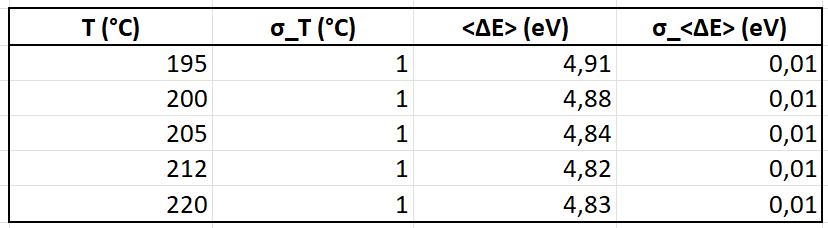

Como se puede observar en las listas correspondientes a cada serie con temperatura diferentes, se puede ver que estas son diferentes al $\Delta U_1$ esperada de $4.67 \ e\text{V}$ y aumentan con forme se aumenta la temperatura. Esto es debido a la energía cinética adicional del electrón antes de colisionar con un átomo de mercurio.

# ACTIVIDAD 02. EJERCICIO 04.

Las discrepancias entre la distancia calculada entre mínimos y el valor esperado de  4.67𝑒V
  se puede explicar teniendo en cuenta la función trabajo del amperímetro, puede este se debe llevar un poco de energía.

# ACTIVIDAD 02. EJERCICIO 05.

Consideramos que las medidas tomadas en la sesión anterior no presentaban discrepancias tan significativas como para volver a tomar datos. Estos se muestran a continuación:

In [ ]:
datos1 = pd.read_csv("ACTIVIDAD 02.05. TOMA 01. T=210. U_2=1.7.csv",sep="	")
datos2 = pd.read_csv("ACTIVIDAD 02.05. TOMA 02. T=210. U_2=1.9.csv",sep="	")
datos3 = pd.read_csv("ACTIVIDAD 02.05. TOMA 03. T=210. U_2=1.3.csv",sep="	")
datos4 = pd.read_csv("ACTIVIDAD 02.05. TOMA 04. T=210. U_2=2.13.csv",sep="	")

plt.plot(datos3["Voltage U1"].values,datos3["Corriente IA"].values, label=r"$U_2 = 1.3$V")
plt.plot(datos1["Voltage U1"].values,datos1["Corriente IA"].values, label=r"$U_2 = 1.7$V")
plt.plot(datos2["Voltage U1"].values,datos2["Corriente IA"].values, label=r"$U_2 = 1.9$V")
plt.plot(datos4["Voltage U1"].values,datos4["Corriente IA"].values, label=r"$U_2 = 2.3$V")
plt.legend()
plt.xlabel(r"Voltaje de aceleración $U_1$ [V]")
plt.ylabel(r"Corriente medida $I_A$ [nA]")
plt.grid()

# ACTIVIDAD 02. EJERCICIO 06. U1=60,00V. U2=2V. UH=XV. T=212°C. (AL MENOS 5 SERIES ÚTILES)

LAS SERIES DE DATOS SE LLAMAN: 

- ACTIVIDAD 02. EJERCICIO 06. U1=60,00V. U2=2V. UH=XV. T=212°C. (1-5). 
- el número entre paréntesis indica la toma de datos.

- ACTIVIDAD 02. EJERCICIO 06. U1=60,00V. U2=2V. UH=6.8V. T=212°C empezó con $T=212\text{ °C}$ y bajó hasta $209\text{ °C}$.
- ACTIVIDAD 02. EJERCICIO 06. U1=60,00V. U2=2V. UH=6.8V. T=212°C empezó con $T=212\text{ °C}$ y bajó hasta $210\text{ °C}$.

In [ ]:
U_H = ["5,8","6,3","6,8"]
datos_U_H = []

for i in range(len(U_H)):
    datos_U_H.append(pd.read_csv("sesion2/ACTIVIDAD 02. EJERCICIO 06. U1 = 60,00 V, U2 = 2V. UH = %sV. T=212°C.csv"%(U_H[i]),sep="	",decimal=','))
    
U_H = ["5.8","6.3","6.8"]

for i in range(len(U_H)):
    plt.plot(datos_U_H[i]["Voltage U1"].values,datos_U_H[i]["Corriente IA"].values, label= U_H[i] + "V")
    
plt.grid(linestyle="-.")
plt.xlabel(r"Voltaje de aceleración $U_1$ [V]")
plt.ylabel(r"Corriente medida $I_A$ [nA]")
plt.legend()


La gráfica muestra cómo al aumentar el voltaje $U_H$ se aumenta la magnitud de la corriente que mide el amperímetro dentro de la estufa. Este es el comportamiento que se esperaba. Esto se puede explicar teniendo en cuenta que al aumentar $U_H$ aumenta la temperatura del electrodo que libera a los electrones, los cuales siguen una distribución de Maxwell-Boltzmann en cuando a velocidades y, por tanto, en energía cinética. Esto es, entre más voltaje $U_H$ introducido, más temperatura puede obtener el electrodo y, por ende, más electrones que tienen una velocidad que les permitiría pasar por el voltaje $U_2$ sin dificultad. 

-----

# ACTIVIDAD 02. EJERCICIO 07. Camino medio libre

In [ ]:
#Tomando los datos de los deltas de voltaje calculados anteriormente
deltas_temp, uncer_deltas_temp
deltas_table = []
for i in range(len(deltas_temp)):
    deltas_table.append(pd.DataFrame({r"$\Delta U_1$ (T = %s)"%(Temp[i]):deltas_temp[i],"Incertidumbre $\sigma_{\Delta U_1}$:": uncer_deltas_temp[i]}))

In [ ]:
deltas_table[0]

In [ ]:
deltas_table[1]

In [ ]:
deltas_table[2]

In [ ]:
deltas_table[3]

In [ ]:
deltas_table[4]

Las tablas anteriores corresponden a las diferencias de energías entre mínimos para cada temperatura junto con la incertidumbre asociada a las mediciones.

In [ ]:
mark = ["^","s","P","*","D"]
nlist = []
pendientes = []
interceptos = []
ax = plt.figure(figsize=(10, 6))
ax.set
for i in range(len(deltas_temp)):
    n = np.array(list(range(1,len(deltas_temp[i])+1))) + np.ones_like(list(range(1,len(deltas_temp[i])+1)))
    nlist.append(n)
    plt.scatter(n,deltas_temp[i],marker=mark[i],label=Temp[i])

plt.xlabel("Orden del mínimo $n$")
plt.ylabel(r"Distancia entre mínimos $\Delta U_1$ [V]" )
plt.grid(linestyle="-.")


x_space = np.linspace(0,11)
for i in range(len(deltas_temp)):
    print("Para la regresión de temperatura T="+Temp[i])
    params = utils.linear_w_regression(nlist[i],deltas_temp[i],1*np.ones_like(deltas_temp[i]),uncer_deltas_temp[i])
    pendientes.append(params[0])
    interceptos.append(params[2])
    print(30*"#")
    plt.plot(x_space,params[0]*x_space + params[2],linestyle="--")

plt.axis([0, 10.5, 4.5, 5.3])
plt.legend()

Las regresiones lineales, en efecto, presentan un aumento de distancia a medida que se aumente en el orden del mínimo. Y, además, siguen el comportamiento esperado: bajar su pendiente a medida que la temperatura aumenta. Sin embargo, las últimas dos temperaturas de $212°\ \text{C}$ y $220°\ \text{C}$ no presentan una pendiente menor en la regresión.

In [ ]:
L = 12e-2 #metros
Ea = 4.67 #eV

camino_medio_libre = np.array(pendientes)*L/(2*Ea)
print(camino_medio_libre)

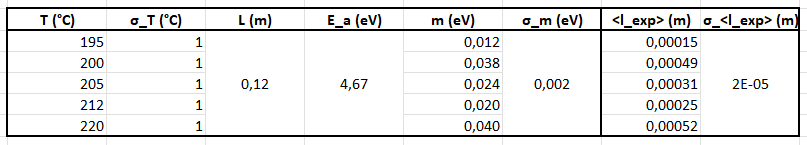


Estos valores de camino libre medio están por encima de lo esperado en un orden de magnitud, esto es, diez veces más de los esperado.

Ahora, en cuanto a la energía $E_a$ calculada por medio de las regresiones lineales, se obtuvieron los siguientes valores correspondientes a las temperaturas $195\ °\text{C}$, $200\ °\text{C}$, $205\ °\text{C}$, $212\ °\text{C}$ y $220\ ° \text{C}$, respectivamente

In [ ]:
for i in range(len(Temp)):
    print("Para la temperatura T = %s la energía E_a es:"%(Temp[i]),pendientes[i]*0.5 +interceptos[i])

Los valores obtenidos para esta energía están muy cerca del valor esperado de $4.67 e\text{V}$, especialmente aquel correspondiente a la temperatura $T = 200°\text{C}$. 

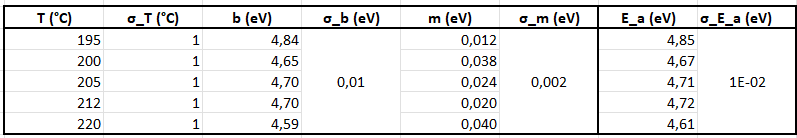